In [1]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 5.7 MB/s 


In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt; plt.rcdefaults()
import json

from datetime import datetime

from Bio import Entrez

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Task 1 – Create a plain text file of the NCBI UIDs for all of the gene-score 1 SFARI genes. Then, using the STRING website (https://string-db.org/) upload the gene-score 1 gene list, select “homo sapiens” as the species and hit search then click continue to visualise the protein-protein interaction network. In this network the genes are the nodes and the interactions between them the edges (connections). Click the “analysis” option near the bottom and report the following statistics: “number of nodes”, “number of edges” and “average node degree” (3 marks).

In [ ]:
sfari_genes_path = "/content/drive/MyDrive/Bioinformatics/coursework 2/SFARI-Gene_genes_11-07-2022release_11-09-2022export.csv"
sfari_genes = pd.read_csv(sfari_genes_path)

In [ ]:
def fetch_id(gene):
    gene = gene + '[gene] AND "Homo sapiens"[Organism]'
    Entrez.email = 's1873532@ed.ac.uk'
    handle = Entrez.esearch(db='gene',
                            sort='relevance',
                            retmax='999999999',
                            retmode='xml',
                            term=gene)
    results = Entrez.read(handle)
    if len(results["IdList"]) > 0:
      return results["IdList"][0]
    else:
      print(gene + " not found")
      return None


sfari_genes = pd.read_csv(sfari_genes_path)

# print(sfari_genes[["gene-symbol", "ensembl-id"]].iloc[0])
# print(gget.info(sfari_genes["ensembl-id"][0]))
# print(gget.info(sfari_genes["ensembl-id"][0]).columns)

# Make list of all the ENSMBL ids
genes = sfari_genes["gene-symbol"]

to_merge = pd.DataFrame(columns=['gene-symbol','ncbi-id'])
for gene in genes:
  # print(gene)
  ncbi_id = fetch_id(gene)
  to_merge = to_merge.append({"gene-symbol":gene, "ncbi-id":ncbi_id}, ignore_index=True)

print(to_merge.shape)
# print(to_merge.head)

# print(sfari_genes.head)

dropped = to_merge.dropna()

# dropped["gene-symbol"] = dropped["gene-symbol"].astype(str)
# dropped["ncbi-id"] = dropped["ncbi-id"].astype(int)
# print(dropped.dtypes)
# print(dropped.loc[dropped["gene-symbol"] == "RP11-1407O15.2"])

print(dropped.shape)

print(sfari_genes.dtypes)
print(dropped.dtypes)

sfari_genes2 = sfari_genes.join(dropped.set_index("gene-symbol"), on="gene-symbol", how="inner")

MSNP1AS[gene] AND "Homo sapiens"[Organism] not found
RP11-1407O15.2[gene] AND "Homo sapiens"[Organism] not found
RPS10P2-AS1[gene] AND "Homo sapiens"[Organism] not found
(1095, 2)
(1092, 2)
status                 int64
gene-symbol           object
gene-name             object
ensembl-id            object
chromosome            object
genetic-category      object
gene-score           float64
syndromic              int64
eagle                float64
number-of-reports      int64
dtype: object
gene-symbol    object
ncbi-id        object
dtype: object


In [ ]:
# USE THE ONES YOU GENERATED LAST TIME DUMMY

# number of nodes:	212
# number of edges:	1523
# average node degree:	14.4

<bound method NDFrame.head of       status gene-symbol                                   gene-name  \
11         9        ADNP  Activity-dependent neuroprotector homeobox   
13         9        ADSL                      adenylosuccinate lyase   
14         9        AFF2                   AF4/FMR2 family, member 2   
22         9        ACTB                                  actin beta   
26         9       AHDC1      AT-hook DNA binding motif containing 1   
...      ...         ...                                         ...   
1065       9       USP9X     ubiquitin specific peptidase 9 X-linked   
1069       9       VEZF1          vascular endothelial zinc finger 1   
1079       9      ZMYND8          zinc finger MYND-type containing 8   
1081       9      ZNF292                     zinc finger protein 292   
1083       9      ZNF462                     Zinc finger protein 462   

           ensembl-id chromosome  \
11    ENSG00000101126         20   
13    ENSG00000239900         22 

Task 2 – Click the “Clusters” option and select “MCL clustering” with the default option. Download the “MCL clusters in TSV format” file. From this, find the two biggest clusters produced by the MCL clustering and use the PantherDB tool as in Part Two to analyse the function of genes in these clusters. This time instead of selecting “Biological Process” ontology use the “Pathway” ontology (6 marks).

In [4]:
string_cluster_path = "/content/drive/MyDrive/Bioinformatics/coursework 2/string_MCL_clusters.tsv"
string_cluster = pd.read_csv(string_cluster_path, sep = "\t")

print(string_cluster.columns)
print(string_cluster.head)

string_cluster_1 = string_cluster.loc[string_cluster["cluster number"] == 1]
print(string_cluster_1.columns)
print(string_cluster_1.head)
string_cluster_1_ids = string_cluster_1['protein identifier'].str.replace("9606.", "").unique()
# print(string_cluster_1_ids)

np.savetxt("/content/drive/MyDrive/Bioinformatics/coursework 2/string_cluster_1_ids.csv", string_cluster_1_ids, fmt="%s", delimiter=",")

string_cluster_2 = string_cluster.loc[string_cluster["cluster number"] == 2]
print(string_cluster_2.columns)
print(string_cluster_2.head)
string_cluster_2_ids = string_cluster_2['protein identifier'].str.replace("9606.", "").unique()
np.savetxt("/content/drive/MyDrive/Bioinformatics/coursework 2/string_cluster_2_ids.csv", string_cluster_2_ids, fmt="%s", delimiter=",")

Index(['#clustering method', 'cluster number', 'cluster color', 'gene count',
       'protein name', 'protein identifier', 'protein description'],
      dtype='object')
<bound method NDFrame.head of     #clustering method  cluster number    cluster color  gene count  \
0                  MCL               1              Red          34   
1                  MCL               1              Red          34   
2                  MCL               1              Red          34   
3                  MCL               1              Red          34   
4                  MCL               1              Red          34   
..                 ...             ...              ...         ...   
196                MCL              38         Hot Pink           1   
197                MCL              39       Hot Pink 2           1   
198                MCL              40  Pale Violet Red           1   
199                MCL              41             Pink           1   
200                M

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Index(['#clustering method', 'cluster number', 'cluster color', 'gene count',
       'protein name', 'protein identifier', 'protein description'],
      dtype='object')
<bound method NDFrame.head of    #clustering method  cluster number cluster color  gene count protein name  \
34                MCL               2        Salmon          27       ARID1B   
35                MCL               2        Salmon          27        ASXL3   
36                MCL               2        Salmon          27         ATRX   
37                MCL               2        Salmon          27        BAZ2B   
38                MCL               2        Salmon          27       BCL11A   
39                MCL               2        Salmon          27         CHD3   
40                MCL               2        Salmon          27         CHD7   
41                MCL               2        Salmon          27       CREBBP   
42                MCL               2        Salmon          27         CTCF   
4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


Try with protein IDs

In [10]:
def fetch_id(gene):
    gene = gene + ' AND "Homo sapiens"[Organism]'
    Entrez.email = 's1873532@ed.ac.uk'
    handle = Entrez.esearch(db='gene',
                            sort='relevance',
                            retmax='999999999',
                            retmode='xml',
                            term=gene)
    results = Entrez.read(handle)
    if len(results["IdList"]) > 0:
      return results["IdList"][0]
    else:
      print(gene + " not found")
      return None

string_cluster_1_gene_ids = []
for string_cluster_1_id in string_cluster_1_ids:
  res = fetch_id(string_cluster_1_id)
  print(res)
  if (res != None):
    string_cluster_1_gene_ids.append(res)

string_cluster_2_gene_ids = []
for string_cluster_2_id in string_cluster_2_ids:
  res = fetch_id(string_cluster_2_id)
  print(res)
  if (res != None):
    string_cluster_2_gene_ids.append(res)

170302
8573
1742
1808
1826
1995
2562
ENSP00000468500 AND "Homo sapiens"[Organism] not found
None
2902
2903
2904
ENSP00000379712 AND "Homo sapiens"[Organism] not found
None
57689
4130
26960
57555
54413
57502
9378
9379
9369
57526
84687
139411
5649
22999
22941
6529
6812
6853
8831
26115
11011
7204
57492
80816
546
29994
53335
1107
55636
1387
10664
1788
2033
3069
51780
4297
58508
8861
9969
23389
4208
5079
6304
ENSP00000282030 AND "Homo sapiens"[Organism] not found
None
6595
6597
6601
10847
7528


In [12]:
print(string_cluster_1_gene_ids)
np.savetxt("/content/drive/MyDrive/Bioinformatics/coursework 2/string_cluster_1_gene_ids.csv", string_cluster_1_gene_ids, fmt="GeneID:%s", delimiter=",")

print(string_cluster_2_gene_ids)
np.savetxt("/content/drive/MyDrive/Bioinformatics/coursework 2/string_cluster_2_gene_ids.csv", string_cluster_2_gene_ids, fmt="GeneID:%s", delimiter=",")

['170302', '8573', '1742', '1808', '1826', '1995', '2562', '2902', '2903', '2904', '57689', '4130', '26960', '57555', '54413', '57502', '9378', '9379', '9369', '57526', '84687', '139411', '5649', '22999', '22941', '6529', '6812', '6853', '8831', '26115', '11011', '7204']
['57492', '80816', '546', '29994', '53335', '1107', '55636', '1387', '10664', '1788', '2033', '3069', '51780', '4297', '58508', '8861', '9969', '23389', '4208', '5079', '6304', '6595', '6597', '6601', '10847', '7528']


Make gene pathway graphs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


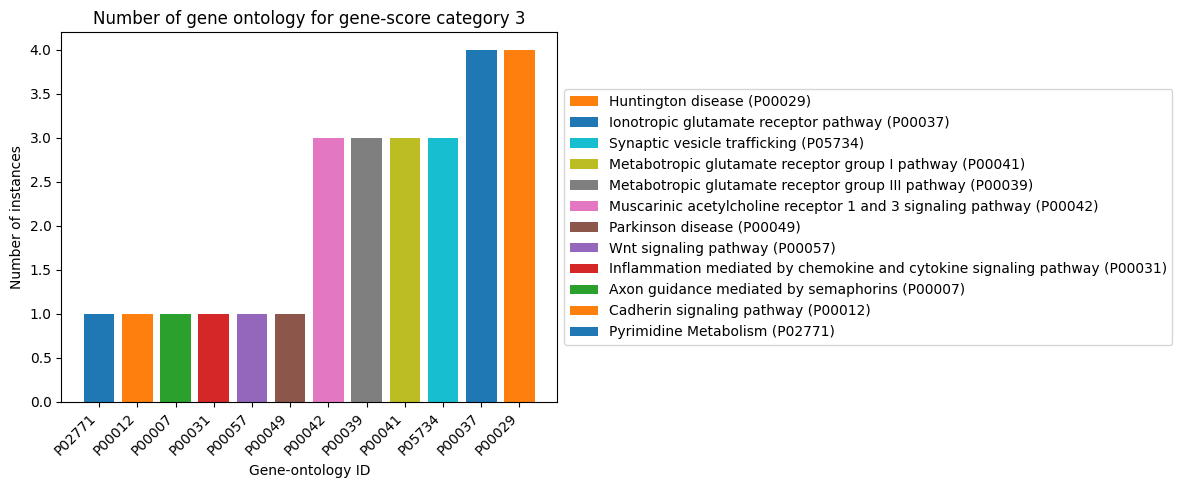

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


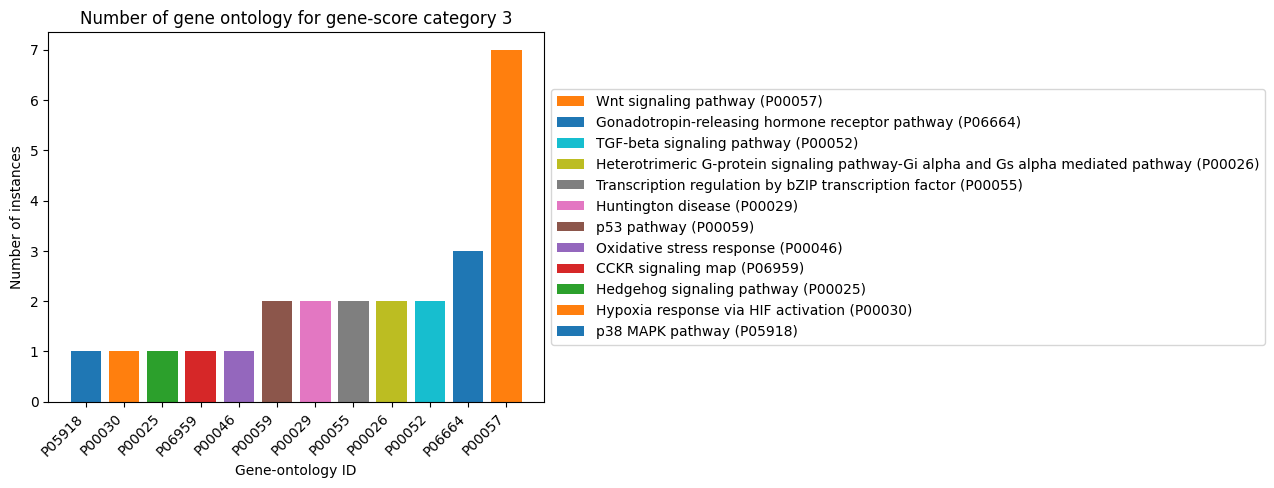

In [5]:
# Since these masochistic twats didnt bother including them in teh data download
pantherdb_headers = ["Category name (Accession)", "# genes", "Percent of gene hit against total # genes", "Percent of gene hit against total # Process hits"]

pantherdb_gene_score_3_path = "/content/drive/MyDrive/Bioinformatics/coursework 2/pantherChartGenePathways1.txt"
pantherdb_gene_score_3 = pd.read_csv(pantherdb_gene_score_3_path, sep="\t", names=pantherdb_headers)
split = pantherdb_gene_score_3["Category name (Accession)"].str.split("(", n = 1, expand = True)
pantherdb_gene_score_3["Category name"] = split[0]
pantherdb_gene_score_3["(Accession)"] = split[1].str.replace(")", "")
pantherdb_gene_score_3.sort_values("# genes", inplace=True)

fig, ax = plt.subplots()

for i in range(0, len(pantherdb_gene_score_3["(Accession)"])):
  ax.bar(pantherdb_gene_score_3["(Accession)"].iloc[i], pantherdb_gene_score_3["# genes"].iloc[i], align='center', label=pantherdb_gene_score_3["Category name (Accession)"].iloc[i])

ax.set_ylabel('Number of instances')
ax.set_xlabel('Gene-ontology ID')
ax.set_title('Number of gene ontology for gene-score category 3')
ax.set_xticklabels(pantherdb_gene_score_3["(Accession)"], rotation = 45,  ha="right")
ax.legend()

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

pantherdb_gene_score_3_path = "/content/drive/MyDrive/Bioinformatics/coursework 2/pantherChartGenePathways2.txt"
pantherdb_gene_score_3 = pd.read_csv(pantherdb_gene_score_3_path, sep="\t", names=pantherdb_headers)
split = pantherdb_gene_score_3["Category name (Accession)"].str.split("(", n = 1, expand = True)
pantherdb_gene_score_3["Category name"] = split[0]
pantherdb_gene_score_3["(Accession)"] = split[1].str.replace(")", "")
pantherdb_gene_score_3.sort_values("# genes", inplace=True)

fig, ax = plt.subplots()

for i in range(0, len(pantherdb_gene_score_3["(Accession)"])):
  ax.bar(pantherdb_gene_score_3["(Accession)"].iloc[i], pantherdb_gene_score_3["# genes"].iloc[i], align='center', label=pantherdb_gene_score_3["Category name (Accession)"].iloc[i])

ax.set_ylabel('Number of instances')
ax.set_xlabel('Gene-ontology ID')
ax.set_title('Number of gene ontology for gene-score category 3')
ax.set_xticklabels(pantherdb_gene_score_3["(Accession)"], rotation = 45,  ha="right")
ax.legend()

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()